# Relatório 1 - Leonardo Gargitter GRR20172145

In [55]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import *
from scipy.fft import *
from scipy.signal import lfilter
from ipywidgets import interactive

clear = lambda: os.system('cls' if os.name == 'nt' else 'clear')

def nextpow2(x):
    res = ceil(log2(x))
    return res.astype('int')  # we want integer values only but ceil gives float

def rect(x):
    return where(abs(x) <= 0.5, 1, 0)


## a) Repetir o experimento 1 (Pulso triangular) utilizando o comando STEM para traçar o gráfico, criar um pequeno algoritmo que torne possível traçar a onda variando o número de pontos. Utilize a FFT e plote um gráfico do espectro de frequência e escreva, com suas próprias palavras, o que este gráfico representa.

Text(0.5, 1.0, 'Pulso triangular')

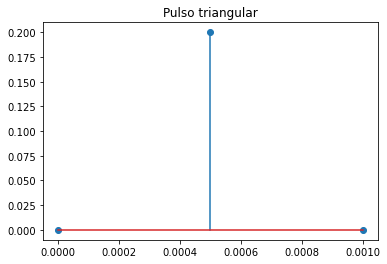

In [2]:
A = 0.2
f = 1000
T = 1 / f
tempo = arange(0, 1.0001 * T, T / 2)
y = zeros(3)
y[1] = A
stem(tempo, y)
title('Pulso triangular')



### Plotagem variando o número de pontos:

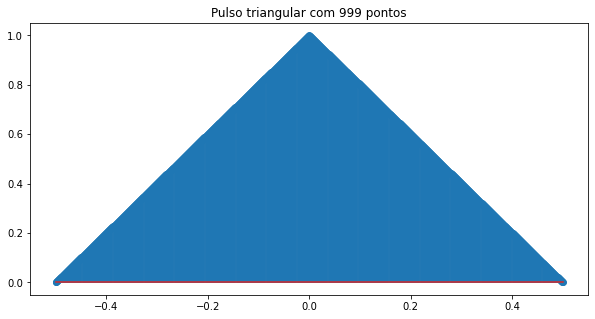

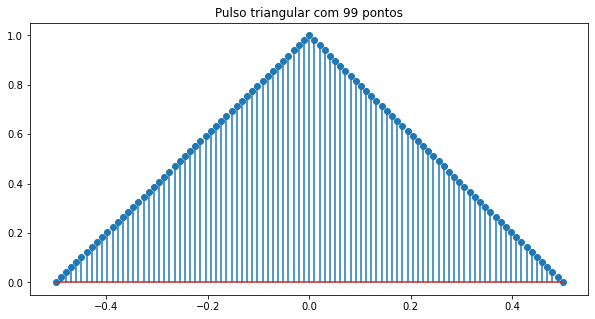

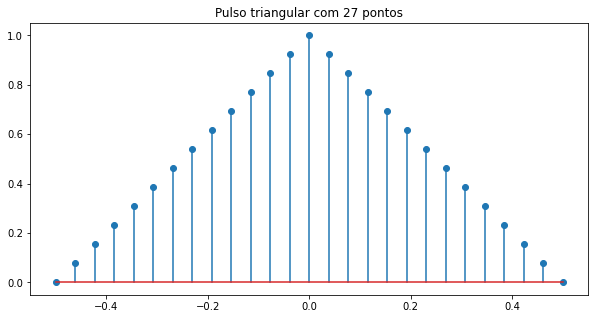

In [73]:
    
def plot_onda_triangular(f_amostragem):    
    t_st = linspace(0, 1, f_amostragem)
    figure(figsize=(10,5))
    stem(t_st-.5, (sawtooth( 2*pi * t_st,.5)+1)/2)
    title(f'Pulso triangular com {f_amostragem} pontos')
    

plot_onda_triangular(999)
plot_onda_triangular(99)
plot_onda_triangular(27)

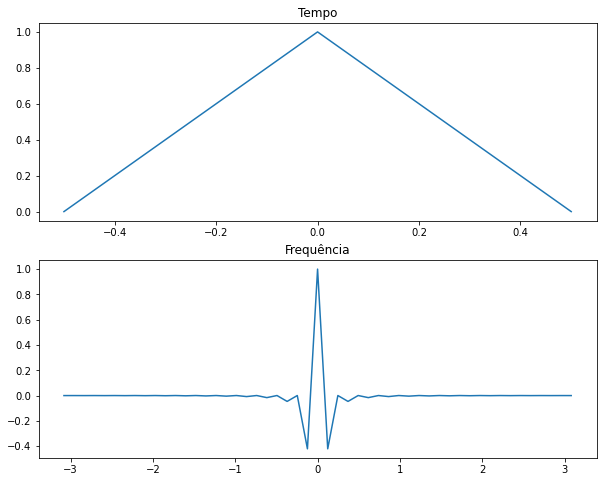

In [84]:
def onda_triangular(f_amostragem):    
    t_st = linspace(0, 1, f_amostragem)
    return t_st-0.5 , (sawtooth( 2*pi * t_st,.5)+1)/2

x,y = onda_triangular(51)
figure(figsize=(10,8))
subplot(2,1,1)
plot(x,y)
title("Tempo")


yf = fftshift(fft(y))
xf = fftshift(fftfreq(len(yf)) * 2 * pi)
subplot(2,1,2)
plot(xf,yf/max(yf))
title('Frequência')
show()

Observando o plot acima percebe-se que realizando a FFT de um pulso triangular nós temos a resposta esperada, uma função sinc.

## b) Variar os parâmetros da onda quadrada e relatar as mudanças no espectro da frequência.


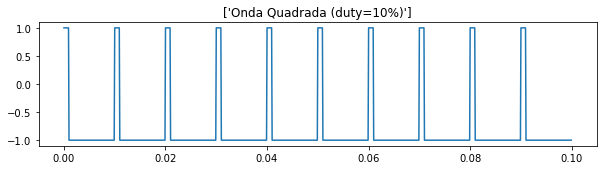

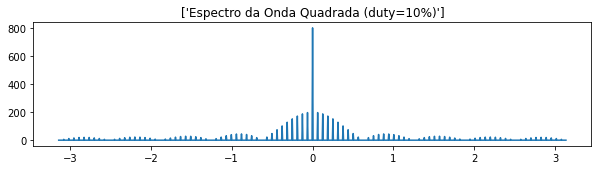

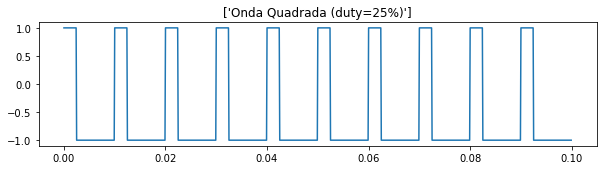

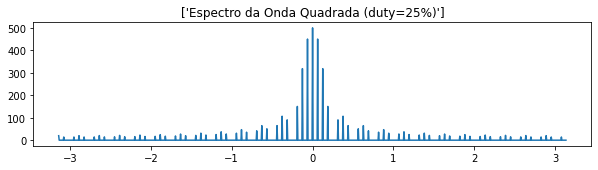

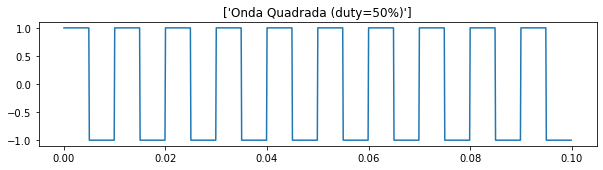

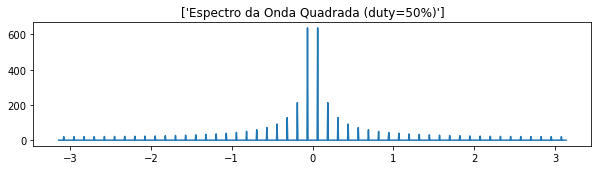

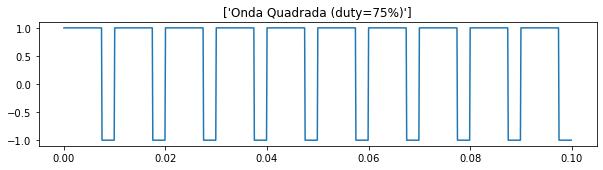

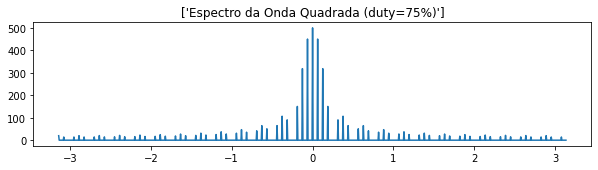

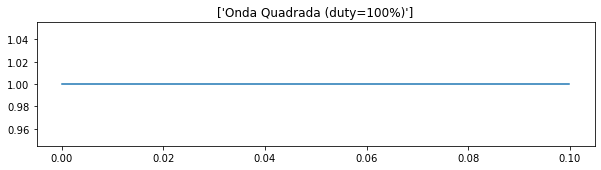

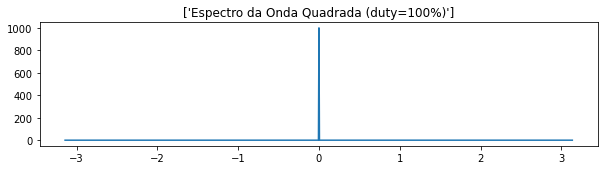

In [12]:
vetor_r = [10, 25, 50, 75, 100]  # Porcentagem de T para To
fc = 150  # Frequencia de corte do filtro
f0 = 100  # Frequencia fundamental da onda quadrada
fs = 100 * f0  # Frequencia de amostragem
periodos = 10
t = arange(0, 1 / f0 * periodos, 1 / fs)

for duty in vetor_r:
    y = square(2 * np.pi * f0 * t, duty=duty / 100)
    figure(figsize=(10,5))
    subplot(2, 1, 1)
    # axis([0, 1 / f0 * periodos - 3, -3, 3])
    title(['Onda Quadrada (duty=' + str(duty) + '%)'])
    plot(t, y)

    yf = fft.fft(y)
    xf = fft.fftshift(fft.fftfreq(len(yf))*2*pi)
    figure(figsize=(10,5))
    subplot(2, 1, 2)
    plot(xf, fft.fftshift(np.abs(yf)))
    title(['Espectro da Onda Quadrada (duty=' + str(duty) + '%)'])
    # axis([-4 * (1 / (duty * 600000)) * f0, 4 * (1 / (duty * 600000)) * f0, 0, max(2 / N * abs(yf)) * 1.2])
    show()

## c) Testar a convolução no tempo e frequência entre a onda quadrada de duração 3 e uma exponencial decrescente de taxa de decaimento 10.

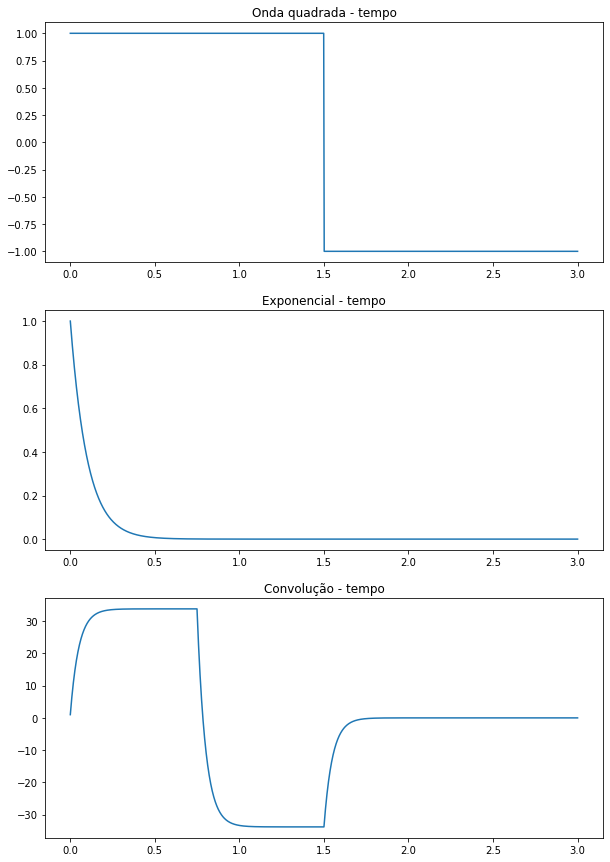

In [145]:
tc = linspace(0,3,1000)
sq = square(2*pi*(1/3.0001)*tc)
expo = exp(-10*tc)
conv_tempo = convolve(expo,sq)

figure(figsize=(10,15))
subplot(3,1,1)
plot(tc, sq)
title('Onda quadrada - tempo')
subplot(3,1,2)
plot(tc,expo)
title('Exponencial - tempo')
subplot(3,1,3)
plot(linspace(0,3,len(conv_tempo)), conv_tempo)
title('Convolução - tempo')
show()

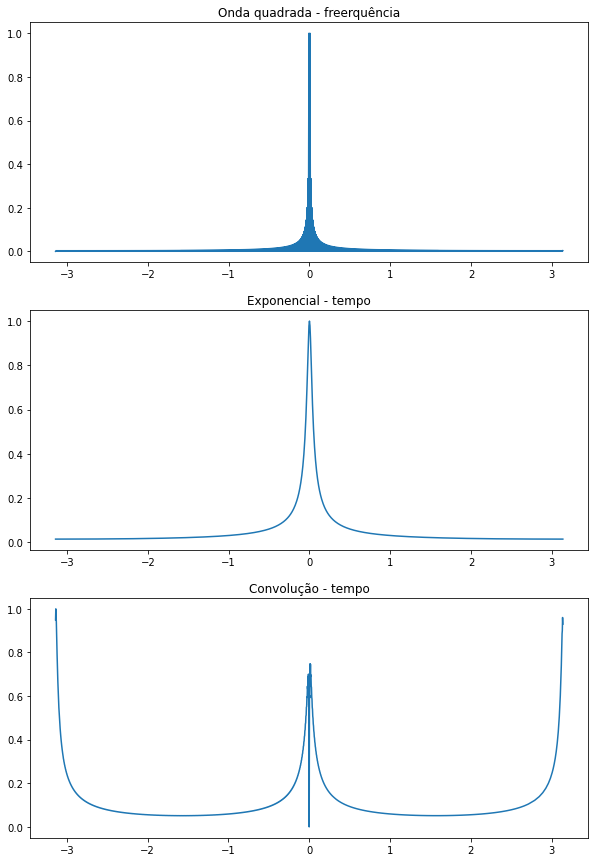

In [148]:
sq_f = fft(sq)
expo_f = fft(expo)
conv_f = convolve(expo_f,sq_f)

sq_f = fftshift(abs(sq_f))
expo_f = fftshift(abs(expo_f))
conv_f = fftshift(abs(conv_f))

figure(figsize=(10,15))
subplot(3,1,1)
plot(fftshift(fftfreq(len(sq_f))*2*pi), sq_f/max(sq_f))
title('Onda quadrada - frequência')
subplot(3,1,2)
plot(fftshift(fftfreq(len(expo))*2*pi),expo_f/max(expo_f))
title('Exponencial - frequência')
subplot(3,1,3)
plot(fftshift(fftfreq(len(conv_f))*2*pi), conv_f/max(conv_f))
title('Convolução - frequência')
show()